<a href="https://colab.research.google.com/github/Anderson13pineida/Algoritmos-de-optimizacion-/blob/main/Anderson_Pineida_Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Anderson Stalin Pineida Escorza <br>
Link: https://colab.research.google.com/drive/16_wHmVSXqpfvkphN3A9Q3xtE6TMFZs5K    <br>
Github:
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

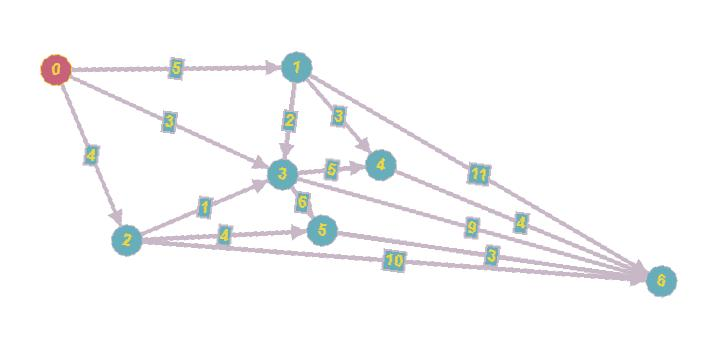

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,999,999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]


TARIFAS

[[0, 5, 4, 3, 999, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#   T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


### Análisis para mejorar nota:
- Generar matrices con valores aleatorios de mayores
dimensiones (5,6,7,…) y ejecutar ambos algoritmos.
- ¿A partir de que dimensión el algoritmo por fuerza bruta
deja de ser una opción?
- ¿Hay algún valor de la dimensión a partir de la cual el
algoritmo de ramificación y poda también deja de ser una
opción válida?

In [ ]:
#Generar matrices con valores aleatorios de mayores dimensiones (5,6,7,…) y ejecutar ambos algoritmos.
import numpy as np
import time
from itertools import permutations
from heapq import heappop, heappush

# Función para resolver el problema de asignación de tareas por fuerza bruta
def fuerza_bruta(cost_matrix):
    n = len(cost_matrix)
    min_cost = float('inf')
    best_permutation = None
    for perm in permutations(range(n)):
        cost = sum(cost_matrix[i][perm[i]] for i in range(n))
        if cost < min_cost:
            min_cost = cost
            best_permutation = perm
    return min_cost, best_permutation

# Función para resolver el problema de asignación con Ramificación y Poda
def ramificacion_poda(cost_matrix):
    n = len(cost_matrix)
    min_cost = float('inf')
    best_permutation = None
    heap = [(0, [], set(range(n)))]

    while heap:
        current_cost, assignment, remaining = heappop(heap)

        if len(assignment) == n:
            if current_cost < min_cost:
                min_cost = current_cost
                best_permutation = assignment
            continue

        if current_cost >= min_cost:
            continue

        i = len(assignment)
        for j in remaining:
            new_cost = current_cost + cost_matrix[i][j]
            new_assignment = assignment + [j]
            new_remaining = remaining - {j}
            heappush(heap, (new_cost, new_assignment, new_remaining))

    return min_cost, best_permutation

# Prueba con diferentes tamaños de matrices
sizes = [3, 4, 5, 6, 7, 8, 9, 10]  # Diferentes dimensiones a probar
results = []

for n in sizes:
    cost_matrix = np.random.randint(1, 100, size=(n, n))  # Matriz de costos aleatoria

    # Medición del tiempo para Fuerza Bruta
    start_time = time.time()
    try:
        min_cost_fb, _ = fuerza_bruta(cost_matrix)
        time_fb = time.time() - start_time
    except MemoryError:
        min_cost_fb, time_fb = None, None  # Si el problema es demasiado grande

    # Medición del tiempo para Ramificación y Poda
    start_time = time.time()
    try:
        min_cost_rp, _ = ramificacion_poda(cost_matrix)
        time_rp = time.time() - start_time
    except MemoryError:
        min_cost_rp, time_rp = None, None

    results.append((n, time_fb, time_rp))

# Mostrar resultados
import pandas as pd
df_results = pd.DataFrame(results, columns=["Tamaño N", "Tiempo Fuerza Bruta (s)", "Tiempo Ramificación y Poda (s)"])
print(df_results)


   Tamaño N  Tiempo Fuerza Bruta (s)  Tiempo Ramificación y Poda (s)
0         3                 0.000000                        0.000000
1         4                 0.000000                        0.000000
2         5                 0.000000                        0.000000
3         6                 0.005140                        0.003231
4         7                 0.026923                        0.022768
5         8                 0.267010                        0.130854
6         9                 2.794894                        0.120364
7        10                30.324662                        0.016754


In [ ]:
#¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?
limite_fuerza_bruta = None
for n, time_fb, _ in results:
    if time_fb is not None and time_fb > 1.0:  # Consideramos inviable si tarda más de 1 segundo
        limite_fuerza_bruta = n
        break

print(f"El algoritmo por fuerza bruta deja de ser viable a partir de N = {limite_fuerza_bruta}")


El algoritmo por fuerza bruta deja de ser viable a partir de N = 9


In [ ]:
#¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda también deja de ser una opción válida?
limite_ramificacion_poda = None
for n, _, time_rp in results:
    if time_rp is not None and time_rp > 1.0:  # Consideramos inviable si tarda más de 1 segundo
        limite_ramificacion_poda = n
        break

if limite_ramificacion_poda:
    print(f"El algoritmo de ramificación y poda deja de ser viable a partir de N = {limite_ramificacion_poda}")
else:
    print("El algoritmo de ramificación y poda sigue siendo viable en los tamaños evaluados.")


El algoritmo de ramificación y poda sigue siendo viable en los tamaños evaluados.


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

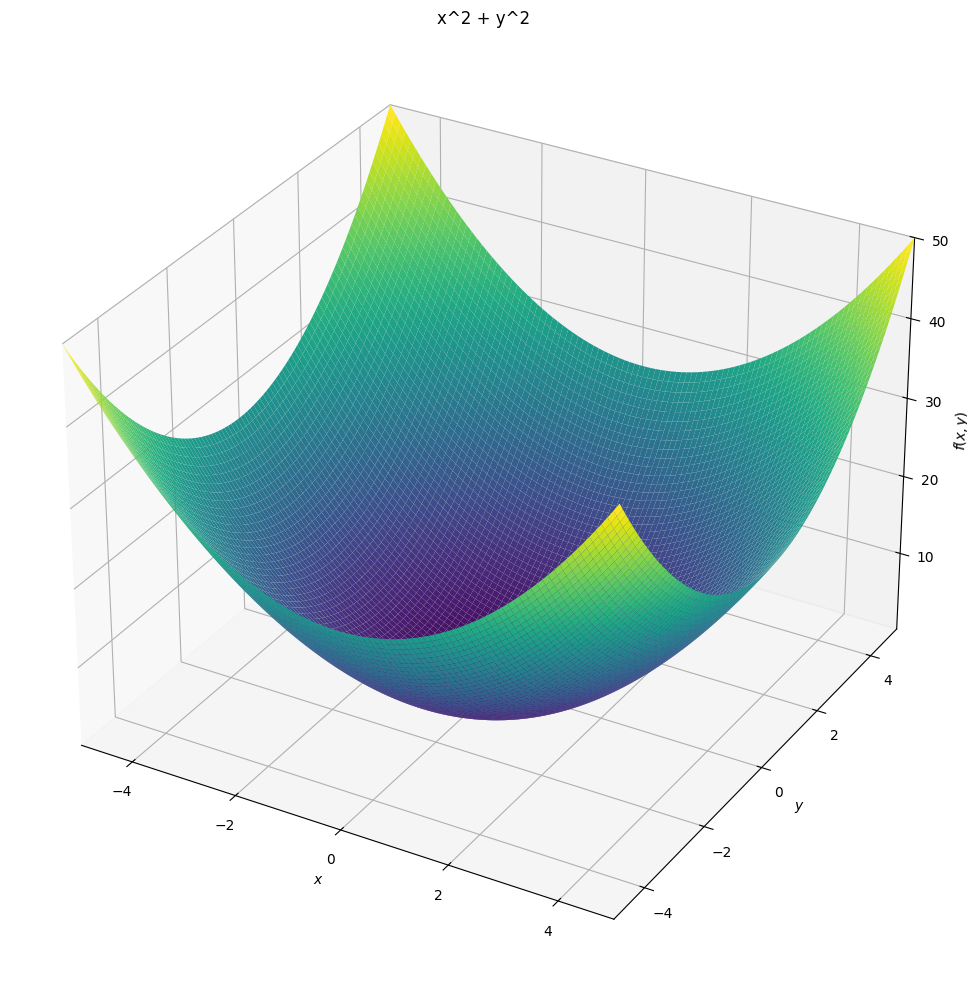

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x^2 + y^2',
       size=(10,10))


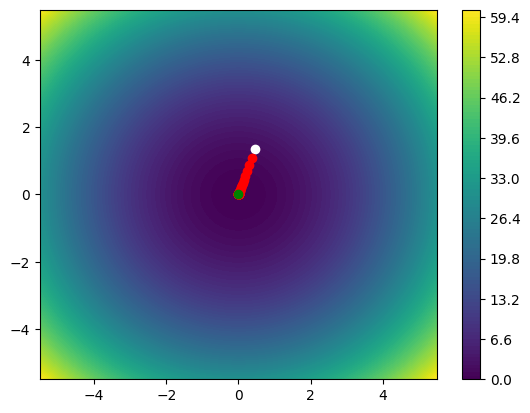

Solucion: [6.560242499932871e-06, 1.9271558403572102e-05] 4.14429744960216e-10


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
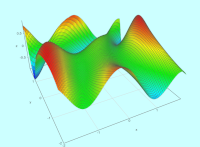


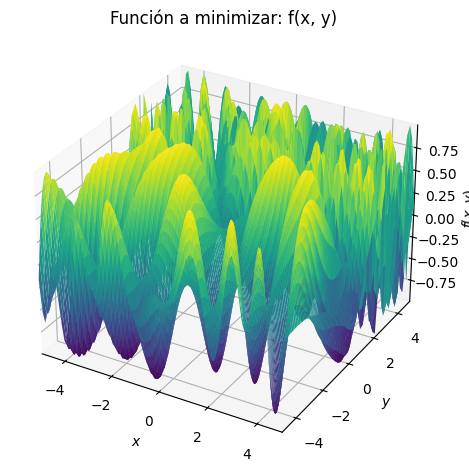

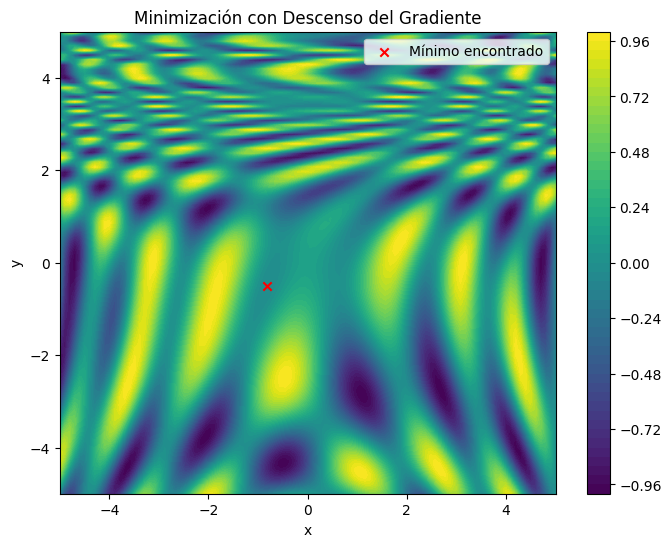

Mínimo encontrado en x = -0.8229221759967067, y = -0.4994179319507464, con f(x, y) = -0.0419832647208856


In [ ]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definir las variables simbólicas
x, y = symbols('x y')

# Definir la función simbólica a minimizar
f_sym = sin(0.5 * x**2 - 0.25 * y**2 + 3) * cos(2 * x + 1 - exp(y))

# Graficar la función en 3D con SymPy
plot3d(f_sym, (x, -5, 5), (y, -5, 5), title='Función a minimizar: f(x, y)')

# Definir la función numérica para la optimización
def f_numeric(xy):
    x, y = xy
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Punto inicial aleatorio
x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)
initial_point = [x0, y0]

# Minimización con descenso del gradiente (BFGS)
result = minimize(f_numeric, initial_point, method='BFGS')

# Extraer resultados
min_x, min_y = result.x
min_f = result.fun

# Crear una visualización de la función en 2D con Matplotlib
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_numeric([X, Y])

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(min_x, min_y, color='red', marker='x', label="Mínimo encontrado")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimización con Descenso del Gradiente')
plt.legend()
plt.show()

# Mostrar el mínimo encontrado
print(f"Mínimo encontrado en x = {min_x}, y = {min_y}, con f(x, y) = {min_f}")

